## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve

## Loading Both the data frames 

In [2]:
fake_users=pd.read_csv('fusers.csv')
fake_users.head(3)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [3]:
fake_users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [4]:
fake_users.shape

(1337, 34)

In [5]:
users=pd.read_csv('users.csv')
users.head(3)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13


In [6]:
users.shape

(1481, 34)

In [7]:
users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

## Feature Engineering

### Adding fake columns

In [8]:
users['Is_Fake']=0

In [9]:
fake_users['Is_Fake']=1

### Joining two data frame

In [10]:
dfs=[users,fake_users]

In [11]:
df=pd.concat(dfs,sort=True)

In [12]:
df.head()

,Is_Fake,created_at,dataset,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,updated,url,utc_offset,verified
0,0,Fri Apr 06 10:58:22 +0000 2007,E13,NaN,NaN,Founder of http://www.screenweek.it & http://w...,145,5470,2385,NaN,...,0C3E53,1.0,NaN,braddd,20370,Rome,2015-02-14 10:54:49,http://braddd.tumblr.com,3600.0,NaN
1,0,Mon Apr 30 15:08:42 +0000 2007,E13,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,9,506,381,NaN,...,333333,1.0,NaN,eKoeS,3131,Rome,2015-02-14 10:54:49,http://www.lineheight.net/,3600.0,NaN
2,0,Tue May 01 11:53:40 +0000 2007,E13,NaN,NaN,Cogito ergo bestemmio.,323,264,87,NaN,...,666666,1.0,NaN,tacone_,4024,Rome,2015-02-14 10:54:49,http://t.co/LKrl1dZE,3600.0,NaN
3,0,Tue May 15 16:55:16 +0000 2007,E13,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",1118,640,622,1.0,...,3C3940,1.0,NaN,alesstar,40586,Rome,2015-02-14 10:54:49,http://alesstar.wordpress.com/,3600.0,NaN
4,0,Sun May 13 19:52:00 +0000 2007,E13,NaN,NaN,Je me souviens,13,62,64,1.0,...,333333,1.0,NaN,PerDiletto,2016,Rome,2015-02-14 10:54:49,http://www.flickr.com/per_diletto,3600.0,NaN


In [13]:
df['Is_Fake'].value_counts()

0    1481
1    1337
Name: Is_Fake, dtype: int64

In [14]:
df.shape

(2818, 35)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1336
Data columns (total 35 columns):
Is_Fake                               2818 non-null int64
created_at                            2818 non-null object
dataset                               2818 non-null object
default_profile                       1728 non-null float64
default_profile_image                 8 non-null float64
description                           2547 non-null object
favourites_count                      2818 non-null int64
followers_count                       2818 non-null int64
friends_count                         2818 non-null int64
geo_enabled                           721 non-null float64
id                                    2818 non-null int64
lang                                  2818 non-null object
listed_count                          2818 non-null int64
location                              2271 non-null object
name                                  2818 non-null object
profile_backgro

In [16]:
df.isnull().sum()

Is_Fake                                  0
created_at                               0
dataset                                  0
default_profile                       1090
default_profile_image                 2810
description                            271
favourites_count                         0
followers_count                          0
friends_count                            0
geo_enabled                           2097
id                                       0
lang                                     0
listed_count                             0
location                               547
name                                     0
profile_background_color                 0
profile_background_image_url             0
profile_background_image_url_https       0
profile_background_tile               2329
profile_banner_url                    1831
profile_image_url                        0
profile_image_url_https                  0
profile_link_color                       0
profile_sid

### Selecting the important features

In [17]:
df.describe()

,Is_Fake,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,listed_count,profile_background_tile,profile_use_background_image,protected,statuses_count,utc_offset,verified
count,2818.000000,1728.0,8.0,2818.000000,2818.000000,2818.000000,721.0,2.818000e+03,2818.000000,489.0,2760.0,0.0,2818.000000,1069.000000,0.0
mean,0.474450,1.0,1.0,234.541164,371.105039,395.363023,1.0,5.374889e+08,2.818666,1.0,1.0,NaN,1672.198368,1478.391020,NaN
std,0.499435,0.0,0.0,1445.847248,8022.631339,465.694322,0.0,2.977005e+08,23.480430,0.0,0.0,NaN,4884.669157,8108.211889,NaN
min,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.0,3.610511e+06,0.000000,1.0,1.0,NaN,0.000000,-39600.000000,NaN
25%,0.000000,1.0,1.0,0.000000,17.000000,168.000000,1.0,3.620867e+08,0.000000,1.0,1.0,NaN,35.000000,3600.000000,NaN
50%,0.000000,1.0,1.0,0.000000,26.000000,306.000000,1.0,6.162253e+08,0.000000,1.0,1.0,NaN,77.000000,3600.000000,NaN
75%,1.000000,1.0,1.0,37.000000,111.000000,519.000000,1.0,6.177673e+08,1.000000,1.0,1.0,NaN,1087.750000,3600.000000,NaN
max,1.000000,1.0,1.0,44349.000000,408372.000000,12773.000000,1.0,1.391998e+09,744.000000,1.0,1.0,NaN,79876.000000,36000.000000,NaN


In [18]:
df.groupby('Is_Fake')['lang'].value_counts()

Is_Fake  lang
0        it      1297
         en       166
         es        10
         fr         3
         de         2
         gl         1
         nl         1
         tr         1
1        en      1336
         es         1
Name: lang, dtype: int64

In [19]:
df.groupby('Is_Fake')['listed_count'].value_counts()

Is_Fake  listed_count
0        0                703
         1                276
         2                134
         3                 70
         4                 52
                         ... 
         486                1
         715                1
         744                1
1        0               1333
         1                  4
Name: listed_count, Length: 67, dtype: int64

In [20]:
df.groupby('Is_Fake')['default_profile'].value_counts()

Is_Fake  default_profile
0        1.0                 397
1        1.0                1331
Name: default_profile, dtype: int64

## Creating a new data frame with important features 

In [21]:
df1=df[['favourites_count','followers_count','statuses_count','friends_count','listed_count','geo_enabled','default_profile','profile_use_background_image','Is_Fake']]

In [22]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,145,5470,20370,2385,52,NaN,NaN,1.0,0
1,9,506,3131,381,40,NaN,NaN,1.0,0
2,323,264,4024,87,16,NaN,NaN,1.0,0
3,1118,640,40586,622,32,1.0,NaN,1.0,0
4,13,62,2016,64,0,1.0,NaN,1.0,0


In [23]:
df1.isnull().sum()

favourites_count                   0
followers_count                    0
statuses_count                     0
friends_count                      0
listed_count                       0
geo_enabled                     2097
default_profile                 1090
profile_use_background_image      58
Is_Fake                            0
dtype: int64

### EDA

In [24]:
df1.fillna(value=0,inplace=True)

/home/s0umyajit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [25]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,145,5470,20370,2385,52,0.0,0.0,1.0,0
1,9,506,3131,381,40,0.0,0.0,1.0,0
2,323,264,4024,87,16,0.0,0.0,1.0,0
3,1118,640,40586,622,32,1.0,0.0,1.0,0
4,13,62,2016,64,0,1.0,0.0,1.0,0


In [26]:
df1.groupby('Is_Fake')['default_profile'].value_counts()

Is_Fake  default_profile
0        0.0                1084
         1.0                 397
1        1.0                1331
         0.0                   6
Name: default_profile, dtype: int64

In [27]:
df1.groupby('Is_Fake')['geo_enabled'].value_counts()

Is_Fake  geo_enabled
0        0.0             762
         1.0             719
1        0.0            1335
         1.0               2
Name: geo_enabled, dtype: int64

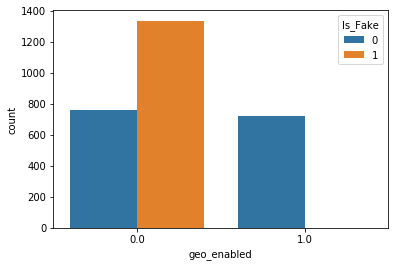

In [28]:
sns.countplot(df1['geo_enabled'],hue=df['Is_Fake'])

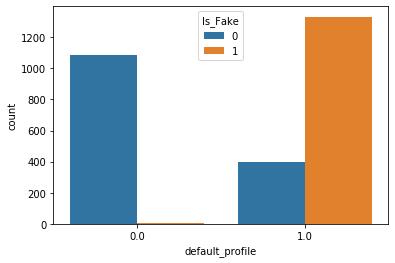

In [29]:
sns.countplot(df1['default_profile'],hue=df['Is_Fake'])

In [30]:
df1.groupby('Is_Fake')['profile_use_background_image'].value_counts()

Is_Fake  profile_use_background_image
0        1.0                             1423
         0.0                               58
1        1.0                             1337
Name: profile_use_background_image, dtype: int64

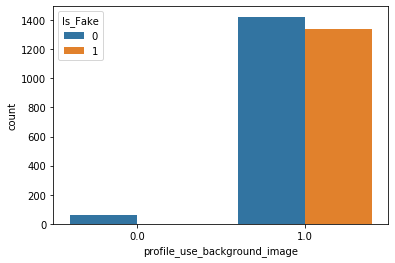

In [31]:
sns.countplot(df1['profile_use_background_image'],hue=df['Is_Fake'])

## Building the model with new data frame

In [32]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,145,5470,20370,2385,52,0.0,0.0,1.0,0
1,9,506,3131,381,40,0.0,0.0,1.0,0
2,323,264,4024,87,16,0.0,0.0,1.0,0
3,1118,640,40586,622,32,1.0,0.0,1.0,0
4,13,62,2016,64,0,1.0,0.0,1.0,0


In [33]:
df1.shape

(2818, 9)

In [35]:
X=df1.drop('Is_Fake',axis=1)

In [36]:
y=df1['Is_Fake']

### Trying different models

In [42]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

In [44]:
cross_val_score(RandomForestClassifier(),X,y,scoring='accuracy',cv=cv)

array([0.99408983, 0.9893617 , 0.9893617 , 0.99763593, 0.9964539 ,
       0.9964539 , 0.99408983, 0.99881797, 0.99408983, 0.99408983])

In [45]:
cross_val_score(SVC(),X,y,scoring='accuracy',cv=cv)

array([0.88416076, 0.87943262, 0.87943262, 0.84042553, 0.8498818 ,
       0.87588652, 0.88061466, 0.8286052 , 0.8498818 , 0.88061466])

In [46]:
cross_val_score(XGBClassifier(),X,y,scoring='accuracy',cv=cv)

array([0.9964539 , 0.99054374, 0.99172577, 1.        , 0.99881797,
       0.9929078 , 0.99763593, 1.        , 0.99527187, 0.99527187])

### XG Boost is the most accurate

### Building the model

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
xg=XGBClassifier()

In [49]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [50]:
prediction=xg.predict(x_test)

### Testing the model

In [53]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       455
           1       1.00      0.99      1.00       391

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



In [54]:
confusion_matrix(y_test,prediction)

array([[455,   0],
       [  3, 388]])

### ROC Curve

In [59]:
fpr, tpr, thresholds=roc_curve(y_test,prediction)

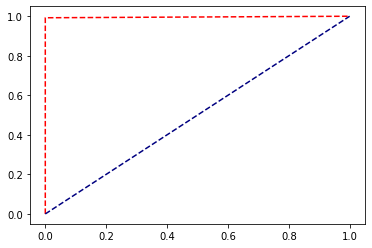

In [66]:
plt.plot(fpr,tpr,linestyle='--',color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

## <center>Model is 99.9% accurate</center>